In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Let's start by reading in a data set

pandas has a built in csv reader, as well as readers for many other types of files


In [4]:
#Note - parts of this tutorial are inspired by https://realpython.com/pandas-python-explore-dataset/

ames = pd.read_csv("AmesHousing.csv")
type(ames)

pandas.core.frame.DataFrame

In [5]:
print(len(ames)) #rows in data set
print(ames.shape) #tuple with (rows, cols)

2930
(2930, 82)


In [6]:
# to get a view of the first five rows of the data set, use the .head() method
ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
# we are missing some columns - we can set an option to see all columns and be able to scroll
pd.set_option("display.max.columns", None)

In [8]:
# to display the last n rows, use .tail(n) - n defaults to 5 like for .head()
ames.tail(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2920,2921,923228310,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,71000
2921,2922,923229110,90,RL,55.0,12640,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,Gd,Rec,936.0,LwQ,396.0,396.0,1728.0,GasA,TA,Y,SBrkr,1728,0,0,1728,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1976.0,Unf,2.0,574.0,TA,TA,Y,40,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,150900
2922,2923,923230040,90,RL,63.0,9297,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,1Story,5,5,1976,1976,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1606.0,Unf,0.0,122.0,1728.0,GasA,TA,Y,SBrkr,1728,0,0,1728,2.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,Detchd,1976.0,Unf,2.0,560.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Family,188000
2923,2924,923250060,20,RL,80.0,17400,Pave,NaN,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1977,1977,Gable,CompShg,BrkFace,BrkFace,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,936.0,Unf,0.0,190.0,1126.0,GasA,Fa,Y,SBrkr,1126,0,0,1126,1.0,0.0,2,0,3,1,TA,5,Typ,1,Gd,Attchd,1977.0,RFn,2.0,484.0,TA,TA,P,295,41,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,160000
2924,2925,923251180,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,131000
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1974,1975,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,1071.0,LwQ,123.0,195.0

In [9]:
# like numpy arrays, each column in pandas has a data type
# unlike numpy arrays, each column can have a different data type

#view data types for each column with the .info() method
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [10]:
# a brief description of the numeric columns can be obtained using the .describe() method
ames.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [11]:
# we probably do not need all 82 columns - lets select the columns we really care about

# to select a specific subset of columns, put a list of the col names in the selection brackets
ames = ames[["Lot Area", "Year Built", "Street", "Bldg Type", "SalePrice", "House Style", "Fireplaces", "Overall Qual", "Overall Cond"]]
ames.head()



,Lot Area,Year Built,Street,Bldg Type,SalePrice,House Style,Fireplaces,Overall Qual,Overall Cond
0,31770,1960,Pave,1Fam,215000,1Story,2,6,5
1,11622,1961,Pave,1Fam,105000,1Story,0,5,6
2,14267,1958,Pave,1Fam,172000,1Story,0,6,6
3,11160,1968,Pave,1Fam,244000,1Story,2,7,5
4,13830,1997,Pave,1Fam,189900,2Story,1,5,5


In [12]:
# to determine how often specific values occur in a column,
# use the .value_counts() method on that columnn

print(ames["Overall Qual"].value_counts())
print()
print(ames["Street"].value_counts())

Overall Qual
5     825
6     732
7     602
8     350
4     226
9     107
3      40
10     31
2      13
1       4
Name: count, dtype: int64

Street
Pave    2918
Grvl      12
Name: count, dtype: int64


In [13]:
# imagine you want to know more about houses that have a quality score of 10

ames[ames["Overall Qual"] == 10].describe() # returns a smaller data frame with just quality == 10

,Lot Area,Year Built,SalePrice,Fireplaces,Overall Qual,Overall Cond
count,31.000000,31.000000,31.000000,31.000000,31.0,31.000000
mean,18070.838710,1997.483871,450217.322581,1.354839,10.0,5.290323
std,11660.283113,28.301791,141975.967956,0.550659,0.0,1.006431
min,3951.000000,1892.000000,160000.000000,1.000000,10.0,5.000000
25%,12586.000000,2003.000000,385625.000000,1.000000,10.0,5.000000
50%,13870.000000,2006.000000,451950.000000,1.000000,10.0,5.000000
75%,16610.500000,2007.000000,540112.000000,2.000000,10.0,5.000000
max,63887.000000,2009.000000,755000.000000,3.000000,10.0,9.000000


In [14]:
# is the overall quality reflective of the price of the house?

# groupby allows you to compress your data based on some criteria
# if you pass in a column name, it will group by the possible options 
# for that column

#Note, groupby() returns a groupby object that you have to call a method on
# it works by "split-apply-combine" in that you split your data on some 
# criteria, apply some method to it, then combine the results 
dataByQual = ames.groupby("Overall Qual").mean(numeric_only = True)
dataByQual

,Lot Area,Year Built,SalePrice,Fireplaces,Overall Cond
Overall Qual,,,,,
1,15213.500000,1942.750000,48725.000000,0.000000,3.000000
2,9326.230769,1933.307692,52325.307692,0.153846,3.538462
3,9439.025000,1931.425000,83185.975000,0.075000,4.475000
4,8464.411504,1946.119469,106485.097345,0.185841,5.446903
5,9995.739394,1955.115152,134752.516364,0.364848,5.824242
6,9787.922131,1967.963115,162130.318306,0.659836,5.795082
7,10308.980066,1988.476744,205025.760797,0.724252,5.430233
8,10617.842857,1997.340000,270913.594286,0.925714,5.205714
9,12776.700935,2004.831776,368336.766355,1.149533,4.953271


In [15]:
# Problem: you want to see the stats for the top 10 most expensive houses in the data set

#first sort the data by price
ames = ames.sort_values(by = ["SalePrice", 'Year Built'], ascending=False) #sort by col "SalePrice" in descending order
ames.head(10) #passing a number into head will reveal that many rows

,Lot Area,Year Built,Street,Bldg Type,SalePrice,House Style,Fireplaces,Overall Qual,Overall Cond
1767,21535,1994,Pave,1Fam,755000,2Story,2,10,6
1760,15623,1996,Pave,1Fam,745000,2Story,2,10,5
2445,35760,1995,Pave,1Fam,625000,2Story,1,10,5
1063,12720,2003,Pave,1Fam,615000,1Story,2,10,5
44,12919,2009,Pave,1Fam,611657,1Story,2,9,5
432,13693,2007,Pave,1Fam,610000,1Story,2,10,5
1637,51974,2006,Pave,1Fam,591587,1Story,2,9,5
2450,17242,1993,Pave,1Fam,584500,2Story,1,9,5
433,13891,2008,Pave,1Fam,582933,2Story,1,9,5
2332,16056,2005,Pave,1Fam,556581,2Story,1,9,5


# More general pandas info

In [16]:
# grab a single column
singleColumn = ames["SalePrice"]
type(singleColumn)

pandas.core.series.Series

In [17]:
# A single column of a data frame is a "series" 
# Consequently, data frames are groups of series that share an index

#each series has an index and values (like a dictionary)

print(singleColumn.index)
print()
print(singleColumn.values)

Index([1767, 1760, 2445, 1063,   44,  432, 1637, 2450,  433, 2332,
       ...
        708,  727, 1555, 1901,  709, 2880, 2843,  726, 1553,  181],
      dtype='int64', length=2930)

[755000 745000 625000 ...  34900  13100  12789]


In [18]:
# also noteworthy is that pandas is built on numpy
type(singleColumn.values)

numpy.ndarray

In [19]:
# you can create series from both lists and dictionaries

# from a list
enrollmentSeries = pd.Series([8624,44718,31672], index = ["Notre Dame", "Michigan", "Alabama"])
print(enrollmentSeries)
print()

#from a dictionary
championships = {"Notre Dame" : 13,
                "Michigan": 11,
                "Alabama" : 15}

championshipSeries = pd.Series(championships) #keys become index, values are values
print(championshipSeries)

Notre Dame     8624
Michigan      44718
Alabama       31672
dtype: int64

Notre Dame    13
Michigan      11
Alabama       15
dtype: int64


In [20]:
# because these two series have the same index, 
#they can be combined into a data frame 

schoolData = pd.DataFrame({"Enrollment":enrollmentSeries,
                          "Championships":championshipSeries})
schoolData

,Enrollment,Championships
Notre Dame,8624,13
Michigan,44718,11
Alabama,31672,15


In [21]:
# data frames are also built using numpy arrays
schoolData.values

array([[ 8624,    13],
       [44718,    11],
       [31672,    15]])

In [22]:
# Easiest way to think about data frames is a dictionary of series objects
# Can access rows by their label

schoolData["Enrollment"] #Returns a series object

Notre Dame     8624
Michigan      44718
Alabama       31672
Name: Enrollment, dtype: int64

In [23]:
# To get a specific enrollment number, call the index of that column
schoolData["Enrollment"]["Notre Dame"]

np.int64(8624)

In [24]:
# to access specific rows, use the .loc method
schoolData.loc["Michigan"]

Enrollment       44718
Championships       11
Name: Michigan, dtype: int64

In [25]:
# You can also access rows by their row number (zero indexed) using .iloc
schoolData.iloc[1]

Enrollment       44718
Championships       11
Name: Michigan, dtype: int64

In [26]:
# You can query your data frame using boolean logic
since2000 = ames[ames["Year Built"] >= 2000] #put a condition on a series in the data frame
since2000.shape

(783, 9)

In [27]:
# you can combine conditions together as well

newDataFrame = ames[
    (ames["Year Built"] > 2000) &
    (ames["SalePrice"] < 200000) & 
    (ames["Bldg Type"] == "1Fam")
                   ]
newDataFrame

,Lot Area,Year Built,Street,Bldg Type,SalePrice,House Style,Fireplaces,Overall Qual,Overall Cond
51,18494,2005,Pave,1Fam,199500,1Story,0,6,5
2459,10936,2006,Pave,1Fam,199000,1Story,0,8,5
251,10402,2009,Pave,1Fam,198900,1Story,0,7,5
2460,8640,2006,Pave,1Fam,198600,1Story,0,8,5
887,7301,2003,Pave,1Fam,198500,SFoyer,1,7,5
...,...,...,...,...,...,...,...,...,...
281,8546,2003,Pave,1Fam,140000,1Story,0,4,5
2470,7733,2005,Pave,1Fam,139500,1Story,0,6,5
2472,13072,2005,Pave,1Fam,132000,1Story,0,6,5
2823,8050,2002,Pave,1Fam,117250,1Story,0,6,5


In [28]:
# you can also create new columns based on the data in the old columns

ames["TotalScore"] = ames["Overall Cond"] + ames["Overall Qual"]

ames.head()

,Lot Area,Year Built,Street,Bldg Type,SalePrice,House Style,Fireplaces,Overall Qual,Overall Cond,TotalScore
1767,21535,1994,Pave,1Fam,755000,2Story,2,10,6,16
1760,15623,1996,Pave,1Fam,745000,2Story,2,10,5,15
2445,35760,1995,Pave,1Fam,625000,2Story,1,10,5,15
1063,12720,2003,Pave,1Fam,615000,1Story,2,10,5,15
44,12919,2009,Pave,1Fam,611657,1Story,2,9,5,14


In [29]:
# pandas also interfaces with matplotlib 
# x axis defaults to index values, y axis to what you specify

# to plot whether total score is correlated with sale price, create 
# data frame with total score as index
totalScoreDF = ames.groupby("TotalScore").mean(numeric_only = True)
totalScoreDF

,Lot Area,Year Built,SalePrice,Fireplaces,Overall Qual,Overall Cond
TotalScore,,,,,,
2,10020.000000,1922.000000,61000.000000,0.000000,1.000000,1.000000
3,11340.000000,1920.000000,55000.000000,0.000000,2.000000,1.000000
4,13422.200000,1943.200000,52497.800000,0.200000,1.800000,2.200000
5,7685.285714,1925.571429,62168.571429,0.142857,2.857143,2.142857
6,12640.600000,1923.400000,64480.266667,0.000000,3.000000,3.000000
7,9691.740741,1944.740741,92570.000000,0.222222,3.481481,3.518519
8,9699.372881,1942.508475,94761.525424,0.254237,4.118644,3.881356
9,9702.383459,1950.902256,117580.751880,0.338346,4.398496,4.601504
10,10135.302452,1960.373297,132074.528610,0.337875,4.877384,5.122616


Text(0, 0.5, 'Sale Price')

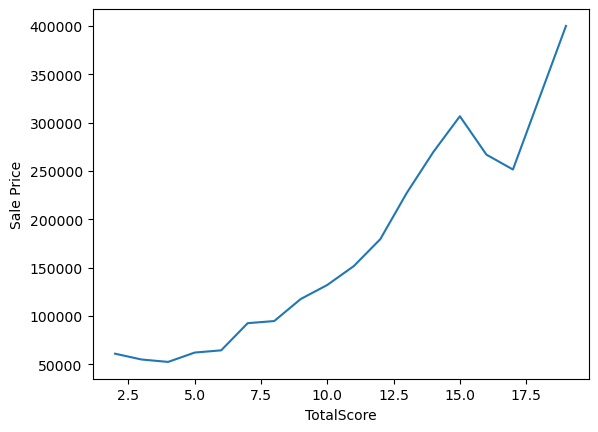

In [30]:
totalScoreDF["SalePrice"].plot()
#can add to plot just like for matplotlib
plt.ylabel("Sale Price")

([<matplotlib.axis.XTick at 0x270c73c96d0>,
 [Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18')])

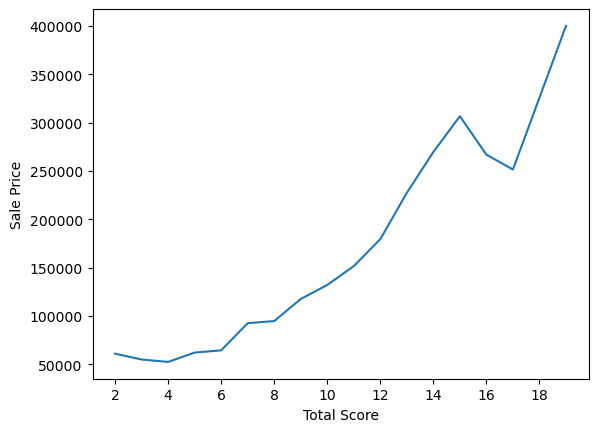

In [31]:
#personal opinion - it is easier to work with matplotlib alone than 
# plotting from data frames directly - matplotlib interfaces well with pandas

plt.plot(totalScoreDF.index,totalScoreDF["SalePrice"])
plt.xlabel("Total Score")
plt.ylabel("Sale Price")
plt.xticks(np.arange(2,20,2))

# Examples

Download the 2021_batting_data.csv file from Canvas (Data from baseball-reference.com). Read this data set into a pandas Da and answer the following questions:

1) Of players with less than 40 at bats, who has the highest number of home runs (HR)?

2) What is the age of the player on the Minnesota Twins (team id MIN) has the highest number of walks (BB)?

3) Create a new column called SO/AB that calculates how often a player strikes out (SO) divided by the number of at-bats for that player (AB). Of non-pitchers (pitchers have a Pos Summary == "/1"), which player has the highest highest SO/AB in the league?

4) Create a plot (either natively in matplotlib or with pandas plotting tool) that plots total number of at-bats on the x-axis and the average SO/AB for a player with that number of at-bats on the y-axis. HINT: you will probably want to use groupby() on the AB column to do this. Can you draw any conclusions from this plot?

Text(0, 0.5, 'Mean Strike-Outs per At-Bats')

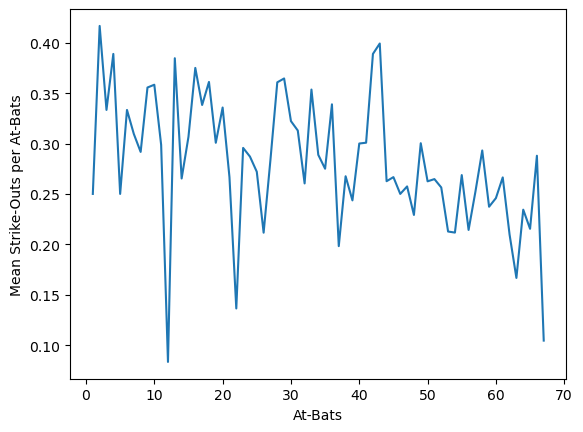

In [81]:
bats = pd.read_csv("2021_batting_data.csv")
num_hr = bats[["Name", "AB", "HR"]]
num_hr = num_hr[num_hr["AB"] >= 1]
num_hr = num_hr[num_hr["AB"] < 40]
num_hr = num_hr[num_hr["HR"] >= 1]
num_hr = num_hr.sort_values(by = ["HR"], ascending = False)
num_hr.head()

twins = bats[["Name", "Age", "Tm", "BB"]]
twins = twins[twins["Tm"] == "MIN"]
twins = twins.sort_values(by = ["BB"], ascending = False)
twins.head()

soab = bats[["Name", "SO", "AB", "Pos Summary"]]
soab = soab[soab["Pos Summary"] != "/1"]
soab["SO/AB"] = soab["SO"] / soab["AB"]
soab = soab.sort_values(by = ["SO/AB"], ascending = False)
soab.head()

mean_ab = soab.groupby("AB")["SO/AB"].mean(numeric_only=True)
plt.plot(mean_ab)
plt.xlabel("At-Bats")
plt.ylabel("Mean Strike-Outs per At-Bats")


# Responses
1. The player with the most amount of home runs with less than 40 at-bats is Byron Buxton with 5 HRs.
2. The Minnesota Twins player with the most amount of walks is 28-year-old Miguel Sano, with 13 walks.
3. There are 3 non-pitchers tied for the highest SO/AB (1.000): Carter Kieboom, Ryan McBroom, and Sheldon Neuse.
4. A conclusion that I can draw from this plot is that, generally, as a player has more at-bats, their SO/AB percentage decreases.